### Neste notebook, faremos a análise exploratória de um dataset de dados de preços de passagens de vôos. No site Kaggle, são propostas algumas questões, as quais tentaremos responder ao longo deste projeto. São elas:

*   O preço varia de acordo com a companhia aérea?
*   Como o preço varia quando a passagem é comprada até dois dias antes do embarque?


*   Os preços das passagens variam de acordo com o horário de partida e de chegada?
*   Como o preço muda de acordo com cada partida ou destino?

*   Como o preço varia de acordo com o tipo de passagem executivo ou econômico?

### O pré-processamento dos dados e modelagem de algoritmos para previsão de preços ficará em outro notebook para que haja melhor organização.


In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
df_inicial = pd.read_csv('Clean_Dataset.csv')

In [4]:
df_inicial

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df_inicial.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

### A primeira pergunta do desafio é checar se o preço varia de acordo com a companhia aérea.

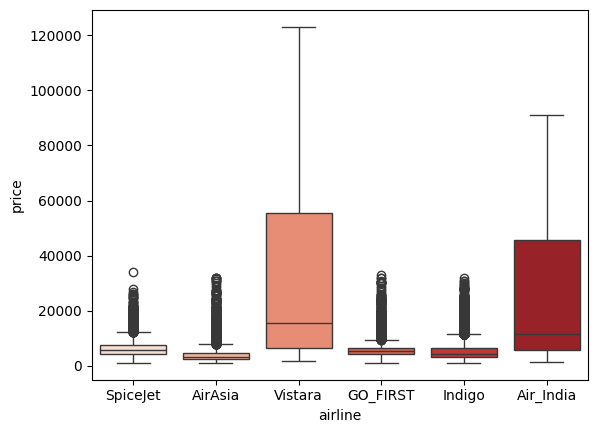

In [7]:
sns.boxplot(data=df_inicial, x=df_inicial['airline'],y = df_inicial['price'], palette="Reds")
plt.show()

### Os boxplots indicam que os preços das empresas Vistara e Air India são mais caros. Além disso, a amplitude de preços praticados pelas outras empresas não é alta, boa parte de seus preços altos na verdade são outlieres. Uma possibilidade é que as empresas mais caras vendam mais assentos executivos.

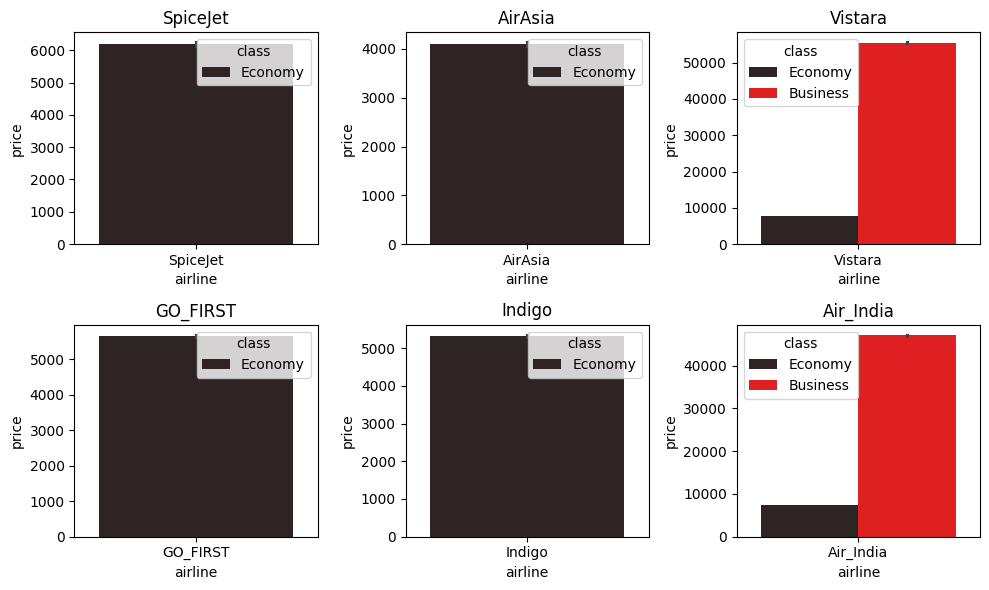

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
companhias = df_inicial['airline'].unique()
subplot=0
for i, companhia in enumerate(companhias):
      df_companhias = df_inicial.loc[df_inicial['airline'] == companhia]
      sns.barplot(data=df_companhias, x="airline", y = 'price', hue='class', color='red', ax=axes[subplot // 3, subplot % 3])
      subplot+=1
      axes[i // 3, i % 3].set_title(companhia)
plt.tight_layout()
plt.show()

### A primeira suposição feita se mostrou verdadeira. Na verdade, as outras companhias sequer possuem assentos executivos, o que ajuda a explicar porque seus preços são tão mais baratos. Outra possibilidade seria que as empresas mais baratas fariam vôos menores. Vamos testar a seguir.

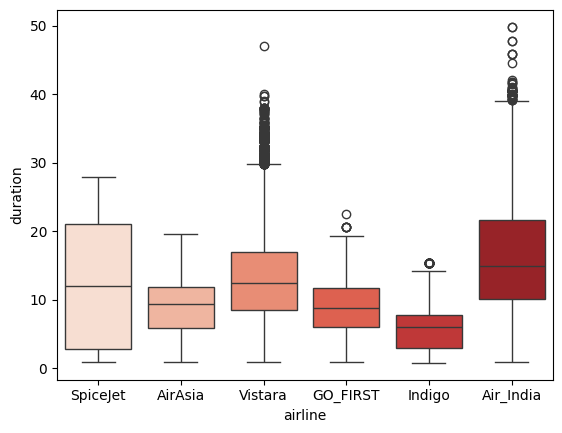

In [11]:
sns.boxplot(data=df_inicial, x=df_inicial['airline'],y = df_inicial['duration'], palette="Reds")
plt.show()

### Vamos analisar estes boxplots por partes. Fica evidente que as duas empresas mais caras, Vistara e Air_India possuem mais outliers com relação à duração das viagens, o que provavelmente indica uma maior distância percorrida e consequentemente maior preço da passagem.

### A próxima pergunta do desafio é "Como o preço é afetado quando as passagens são compradas um ou dois dias antes da partida"

In [13]:
df_2dias = df_inicial.query("days_left <= 2")
df_antecedencia = df_inicial.query("days_left > 2")

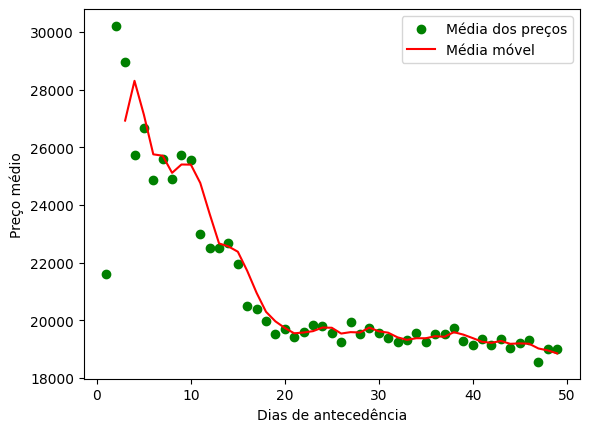

In [28]:
media_precos = df_inicial.groupby('days_left')['price'].mean()

plt.scatter(media_precos.index, media_precos.values, color='green')
plt.xlabel('Dias de antecedência')
plt.ylabel('Preço médio')
moving_avg = media_precos.rolling(window=3).mean()
plt.plot(moving_avg.index, moving_avg.values, color='red')
plt.legend(['Média dos preços', 'Média móvel'])

plt.show()

### Neste gráfico, podemos ver que a média dos preços diminui quanto maior a antecedência com que a passagem é comprada

### A próxima pergunta é se o preço das passagens é afetado pela hora de partida e de chegada do vôo. Vimos anteriormente que a duração do vôo afeta o preço da passagem por estar relacionada à distância. Agora analisaremos mais especificamente com relação ao horário de partida e de chegada.

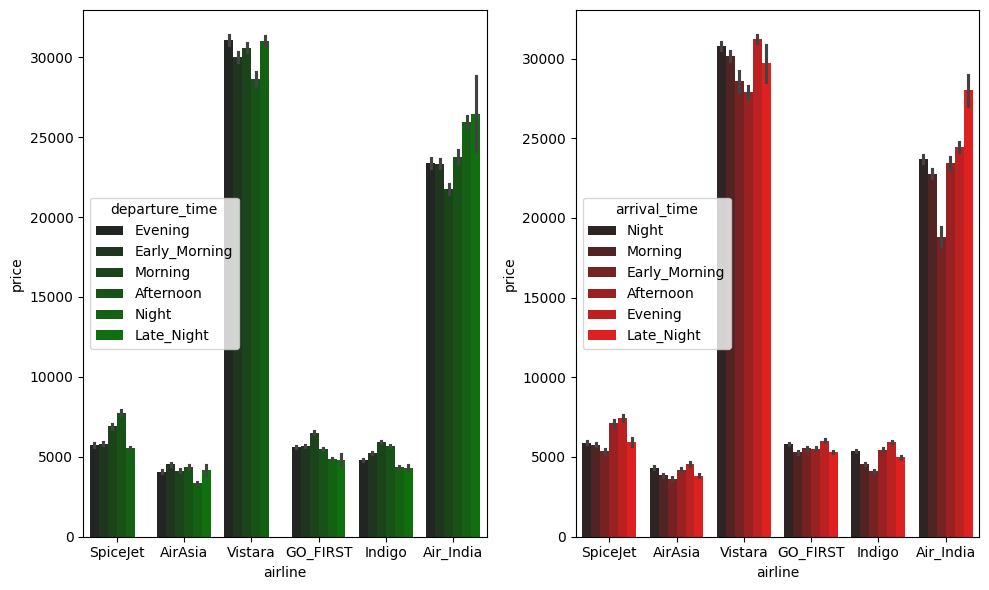

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.barplot(data=df_inicial, x='airline', y='price', hue='departure_time', color='green', ax=axes[0])
sns.barplot(data=df_inicial, x='airline', y='price', hue='arrival_time', color='red',ax=axes[1])
plt.tight_layout()
plt.show()

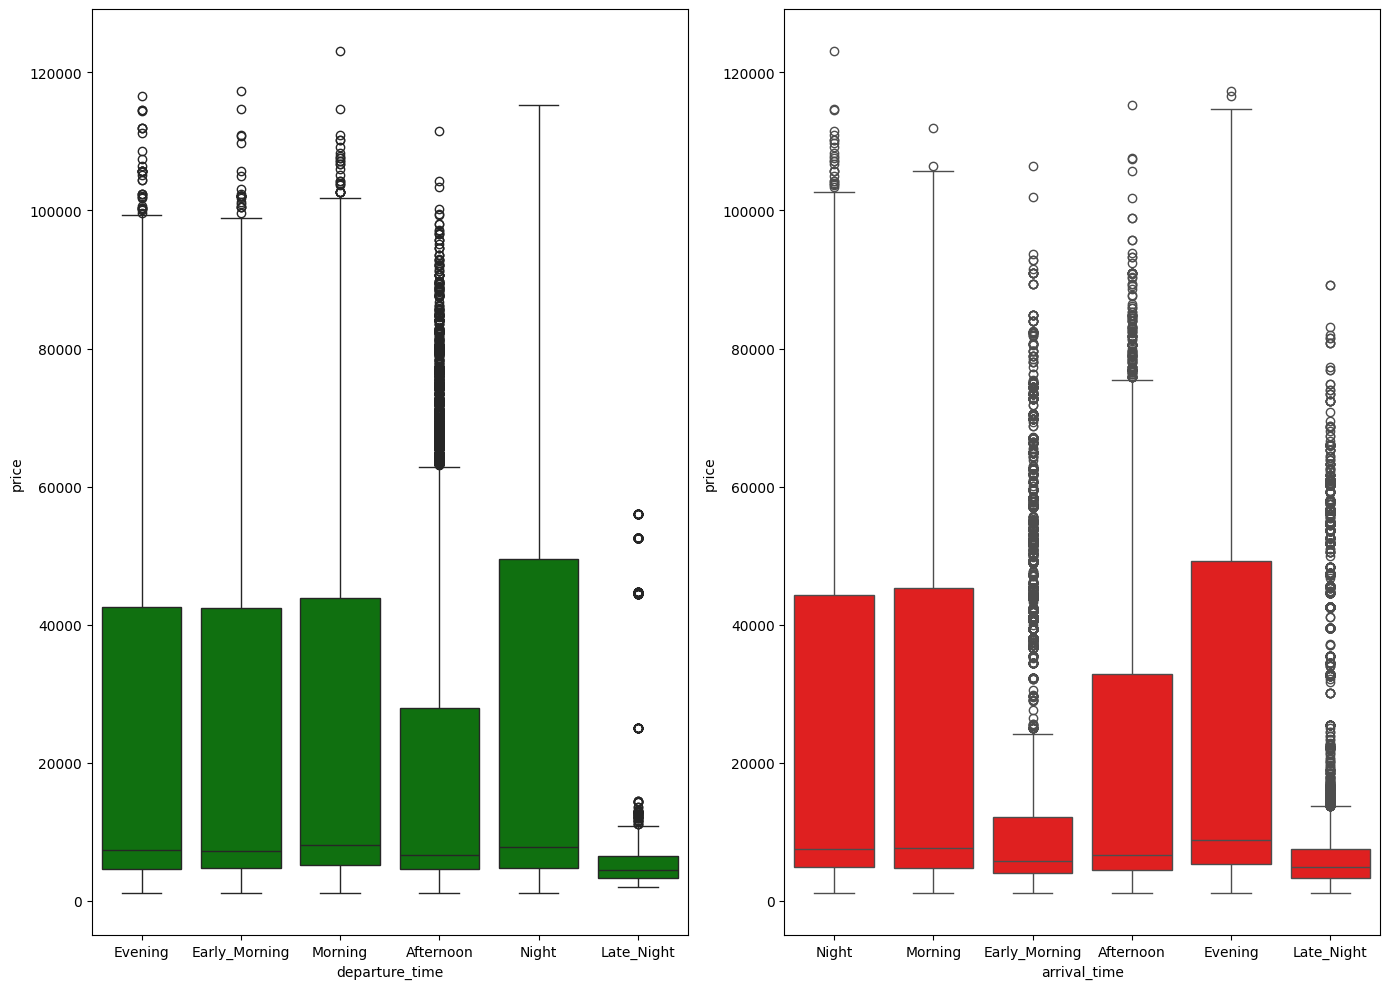

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
sns.boxplot(data=df_inicial, x='departure_time', y='price', color= 'green', ax=axes[0])
sns.boxplot(data=df_inicial, x='arrival_time', y='price', color= 'red',ax=axes[1])
plt.tight_layout()
plt.show()


### Desconsiderando outliers, pode-se dizer que as viagens iniciadas à tarde e no final da noite são mais baratas, assim como as viagens que se encerram no início da manhã e no final da noite.

### A próxima questão é como o preço varia de acordo com o local de partida e de chegada

In [57]:
df_inicial.groupby('source_city')['airline'].nunique()

source_city
Bangalore    6
Chennai      6
Delhi        6
Hyderabad    6
Kolkata      6
Mumbai       6
Name: airline, dtype: int64

In [58]:
df_inicial.groupby('source_city')['duration'].mean()


source_city
Bangalore    12.029203
Chennai      12.838901
Delhi        11.515499
Hyderabad    12.268075
Kolkata      13.249898
Mumbai       11.888448
Name: duration, dtype: float64

In [61]:
df_inicial.groupby('destination_city')['airline'].nunique()

destination_city
Bangalore    6
Chennai      6
Delhi        6
Hyderabad    6
Kolkata      6
Mumbai       6
Name: airline, dtype: int64

In [62]:
df_inicial.groupby('destination_city')['duration'].mean()

destination_city
Bangalore    12.058039
Chennai      13.338900
Delhi        10.513310
Hyderabad    13.381945
Kolkata      13.214953
Mumbai       11.583355
Name: duration, dtype: float64

### Primeiramente, temos uma análise simples para verificar se todas companhias aéreas operam em cada uma das cidades de partida e chegada, assim como as durações médias das viagens, já que sabemos que são fatores que podem influenciar no preço.

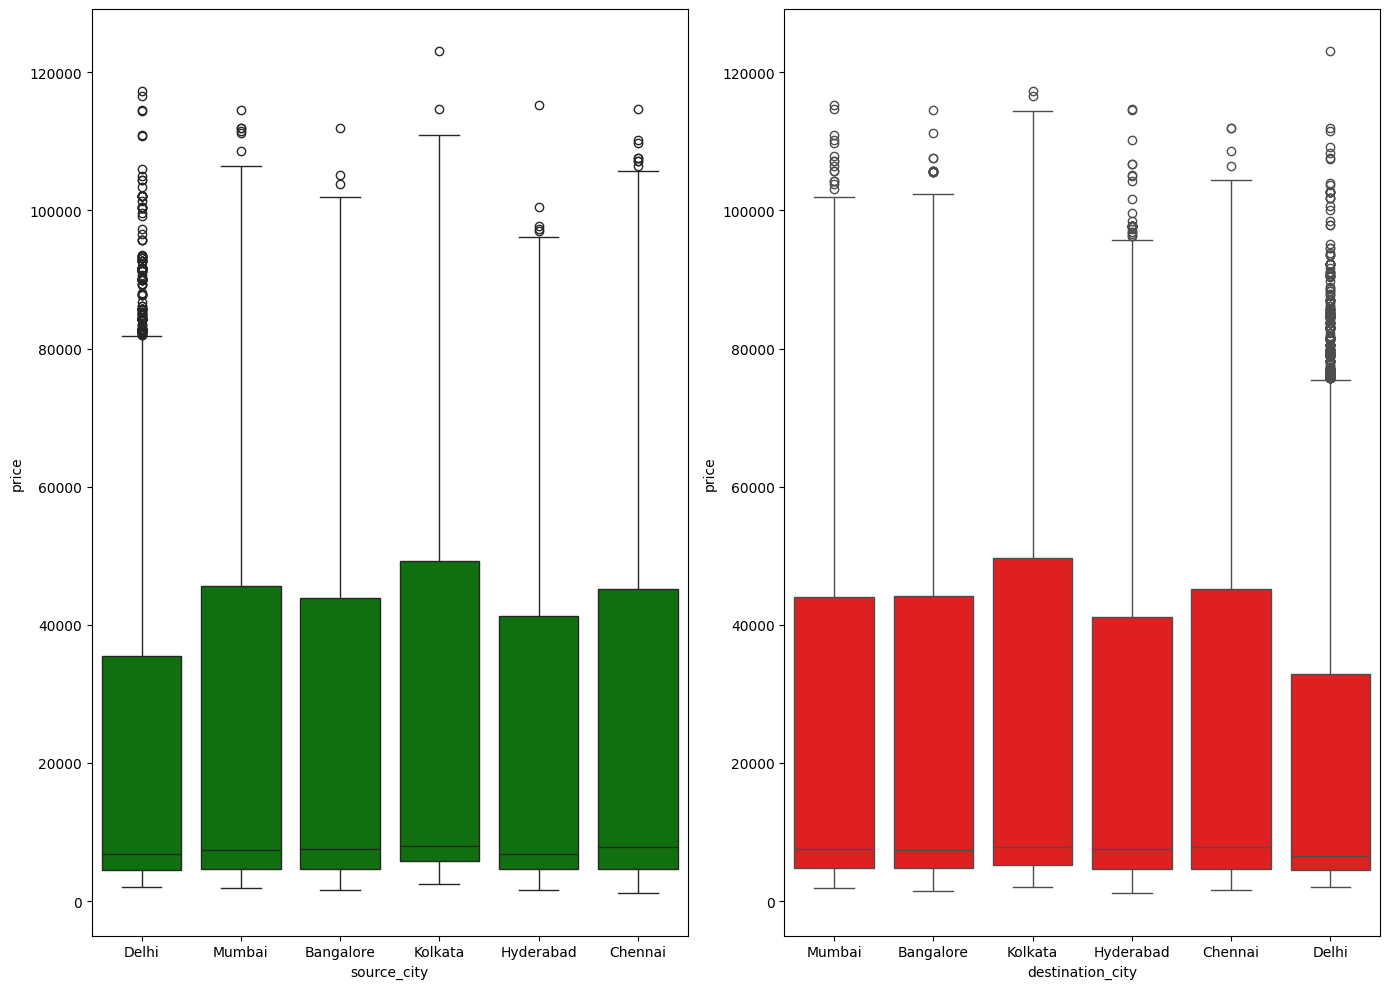

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
sns.boxplot(data=df_inicial, x='source_city', y='price', color= 'green', ax=axes[0])
sns.boxplot(data=df_inicial, x='destination_city', y='price', color= 'red',ax=axes[1])
plt.tight_layout()
plt.show()

### De fato as viagens com partida e destino em Delhi parecem ser mais baratas, conversando com a média de duração das viagens. No entanto, Mumbai que possui a segunda menor média de duração não é a segunda cidade de partida e destino mais barata, mas sim Hyderabad.
### O Boxplot desperta uma dúvida. Por que há tantos preços outliers quando a cidade de partida ou destino é Delhi? Vamos checar se tem a ver com a oferta de assentos executivos

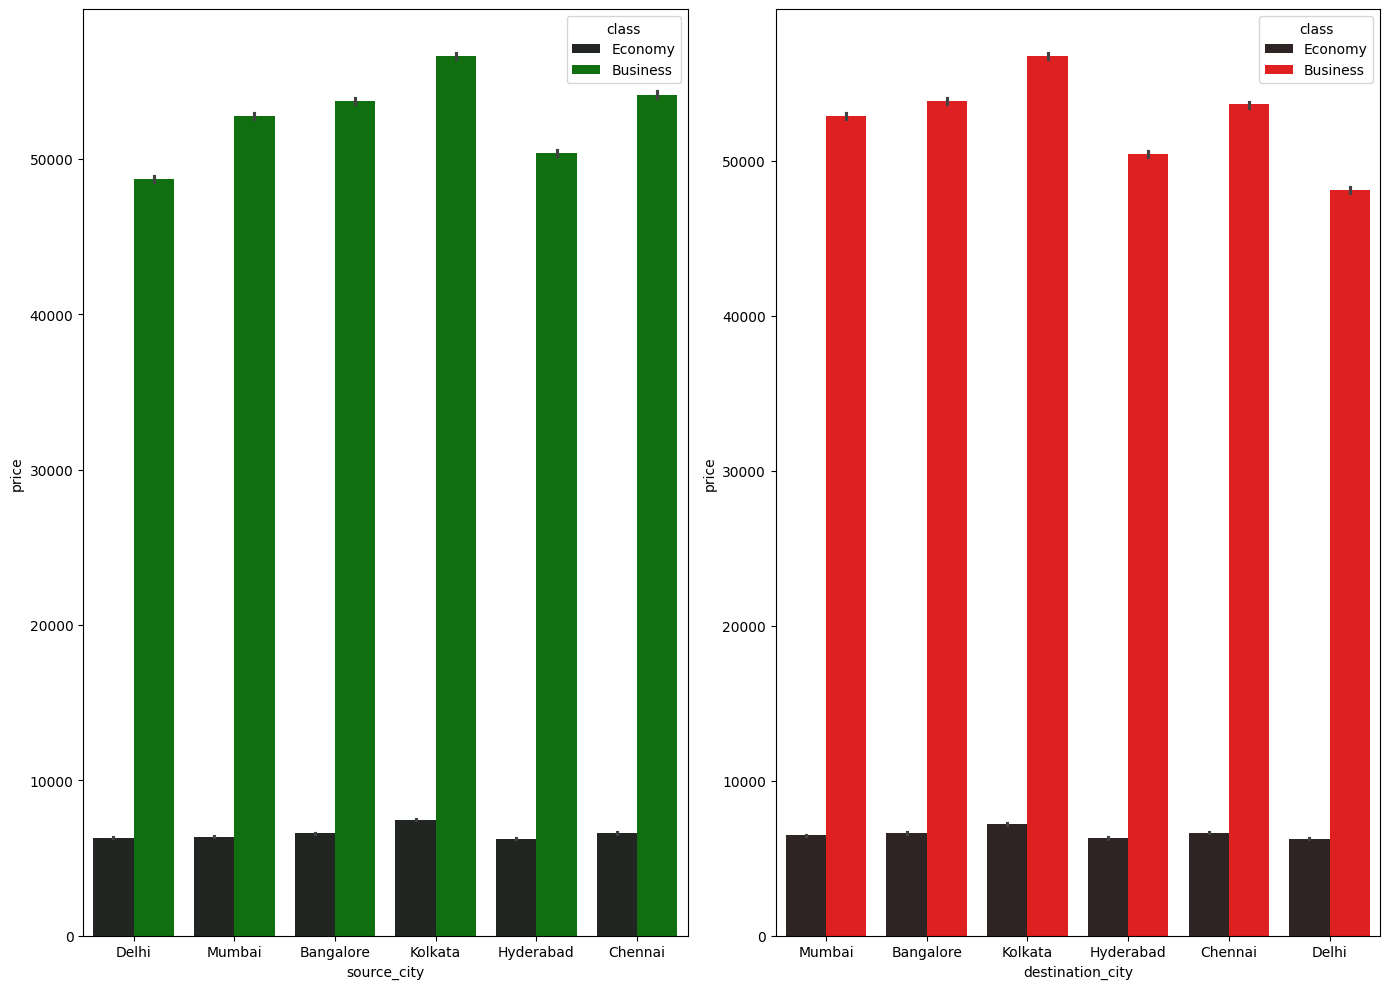

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,10))
sns.barplot(data=df_inicial, x='source_city', y='price', hue='class', color='green',ax=axes[0])
sns.barplot(data=df_inicial, x='destination_city', y='price', hue='class', color='red',ax=axes[1])
plt.tight_layout()
plt.show()

### Esse não parece ser o motivos de haver mais outliers. Vamos então consultar um df que possua apenas os outliers de preços relacionados à Delhi

In [69]:
df_delhi_source = df_inicial[(df_inicial['source_city'] == 'Delhi') & (df_inicial['price'] > df_inicial['price'].quantile(0.75))]
df_delhi_destination = df_inicial[(df_inicial['destination_city'] == 'Delhi') & (df_inicial['price'] > df_inicial['price'].quantile(0.75))]


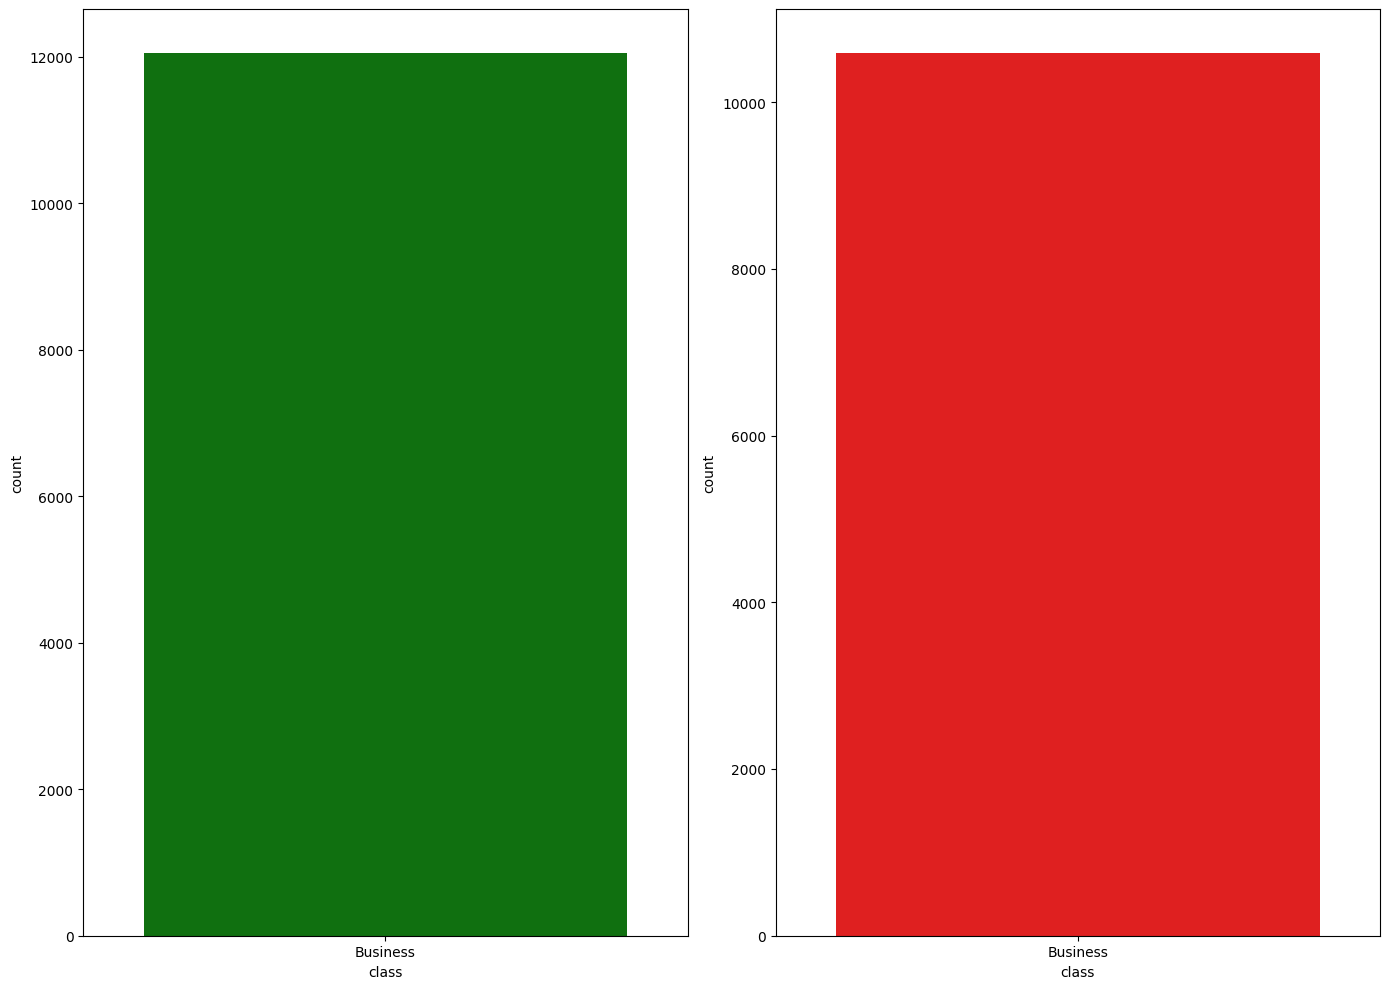

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
sns.countplot(data=df_delhi_source, x='class', color='green', ax=axes[0])
sns.countplot(data=df_delhi_destination, x='class', color='red', ax=axes[1])
plt.tight_layout()
plt.show()


### Apesar das viagens para Delhi não possuírem mais assentos executivos do que outras cidades, vemos que todos outliers são de assentos executivos. Vamos então comparar os preços dos assentos executivos entre cidades.

In [79]:
df_business = df_inicial.query("`class` == 'Business'")

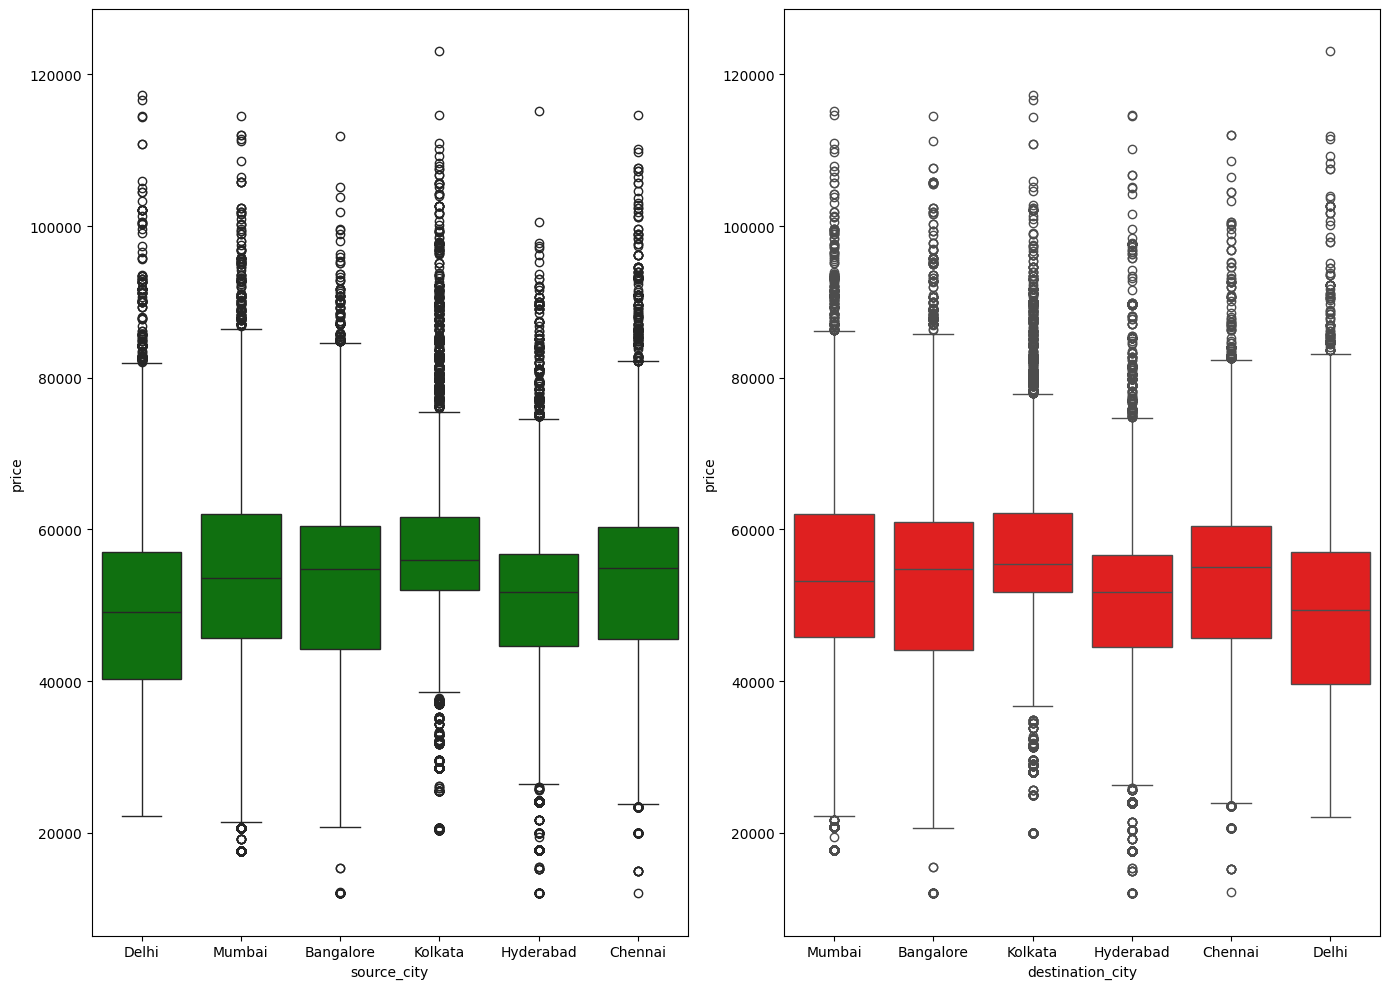

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,10))
sns.boxplot(data=df_business, x='source_city', y='price', color='green', ax=axes[0])
sns.boxplot(data=df_business, x='destination_city', y='price', color='red', ax=axes[1])
plt.tight_layout()
plt.show()


### Não é possível inferir que os assentos executivos e partida ou destino em Delhi são mais caros do que os assentos executivos em outras cidades.
### Vimos anteriormente que as passagens compradas em cima da hora costumam ser mais caras. Vamos fazer um teste simples para verificar se o número de passagens compradas em cima da hora é maior para Delhi. Consideraremos o limite de 5 dias antes da partida.

In [96]:
df_d5 = df_inicial.query("days_left <= 5")


In [97]:
df_d5['source_city'].value_counts()


Mumbai       4484
Delhi        4453
Bangalore    3769
Kolkata      3071
Hyderabad    2463
Chennai      2430
Name: source_city, dtype: int64

In [98]:
df_d5['destination_city'].value_counts()

Mumbai       4111
Delhi        3745
Kolkata      3498
Bangalore    3490
Hyderabad    3026
Chennai      2800
Name: destination_city, dtype: int64

### Há uma diferença interessante entre o número de passagens comprados de última hora para partida em Delhi e as demais cidades. É importante notar também que apesar de haver muitos assentos comprados de última hora com partida em Mumbai, estes não se tornam outliers. Possivelmente, os preços aumentam ainda mais para Delhi do que outras cidades ao se aproximar da data de partida ou chegada.

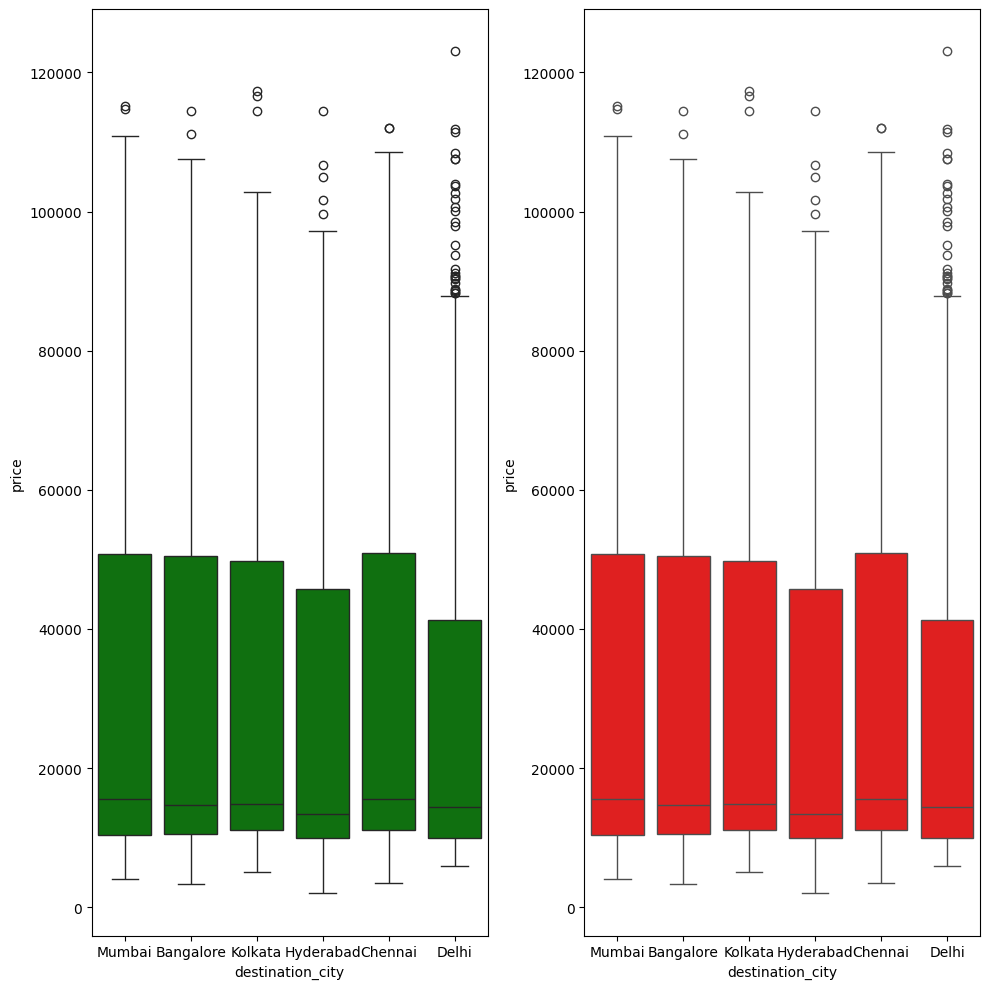

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
sns.boxplot(data=df_d5, x='destination_city', y='price', color='green',ax=axes[0])
sns.boxplot(data=df_d5, x='destination_city', y='price', color='red', ax=axes[1])
plt.tight_layout()
plt.show()

### De fato os boxplots indicam mais outliers para partida e chegada à Delhi. Sendo assim, podemos especular um motivo para os preços mais altos praticados com relação à própria média de preços para passagens com partida e chegada à Delhi vendidas de última hora.
### A última questão do desafio é verificar como a os tipos de assentos impactam os preços. Porém, como isso já foi feito na investigação da diferença de preços entre companhias, vamos plotar o comportamento dos preços de acordo com a duração para verificar se de fato há uma relação linear de quanto maior a viagem, mais cara.

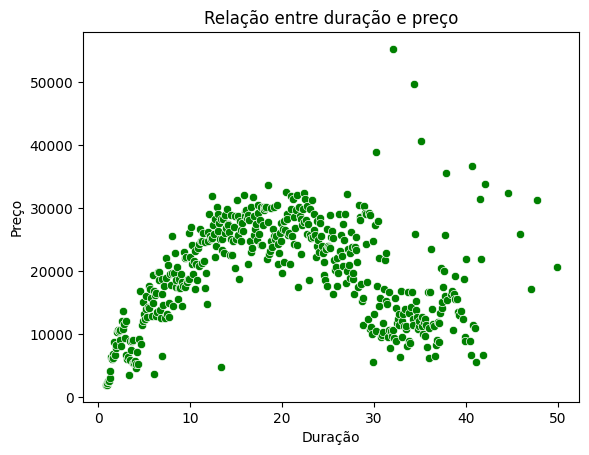

In [128]:
media_preco_duracao = df_inicial.groupby(['duration'])['price'].mean()
df_duracao = media_preco_duracao.reset_index()
sns.scatterplot(data=df_duracao, x='duration', y='price', color='green')
plt.title('Relação entre duração e preço')
plt.xlabel('Duração')
plt.ylabel('Preço')
plt.show()

### Vemos ao final que na verdade, o comportamento dos preços com relação à duração se aproxima de uma função do segundo grau, sendo os maiores preços das viagens de média duração. Contudo, há sim outliers de viagens consideravelmente mais caras a partir de 30 horas de duração.

### Assim, chegamos ao final do desafio das questões propostas com vários insights sobre os dados. Como explicado no início deste notebook, ele foi dedicado à análise exploratória dos dados de forma a deixar mais organizados os processos. No próximo notebook, teremos a parte de pré-processamento dos dados, treinamento de modelos, teste de hiperparâmetros, validação e testes de desempenho.